# <u><center>Simulators</center></u>

<b><i>This tutorial will walk you through the components of a  simulators and state vectors. So strap yourself in for an amazing learning adventure!</i></b>


### <b><i>What is a Simulator?</b></i>
- <font color=darksalmon>Quantum simulators</font> permit the study of a quantum system in a programmable fashion. In this instance, simulators are special purpose devices designed to provide insight about specific physics problems. 

- Qiskit provides two simulators, <font color=darksalmon>Basic Aer and Aer</font>. The main difference is that BasicAer runs in Python and Aer runs in C++ and is therefore faster. In addition, Aer supports more features. Aer supports several simulation methods. The default method is 'statevector'.

- In this tutorial we will show you how to import the <font color=darksalmon>Qiskit Aer simulator</font> backend and use it to run ideal (noise free) Qiskit Terra circuits.


In [ ]:
#run this cell to install qiskit 
#skip this cell if you have pre-installed qiskit library or if you are running on IBM-Quantum
! pip install qiskit

In [1]:
#The following statements import useful libraries containing functions and methods that will help us build the circuit.
from qiskit import *
from qiskit.circuit import *
from qiskit.visualization import *
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import qiskit.tools.jupyter
import numpy as np
print("Libraries imported successfully")

Libraries imported successfully


> ### Qiskit Aer Simulator

Qiskit Aer is high-performance quantum computing simulators with realistic noise models. It provides interfaces to run quantum circuits with or without noise using multiple different simulation methods. Qiskit Aer supports leveraging MPI and running on GPUs to improve the performance of simulation. The Aer provider contains a variety of high performance simulator backends for a variety of simulation methods.

A new simulator backend can be created using <font color=darksalmon>Aer.get_backend('aer_simulator')</font>.

> ### Simulating a Quantum Circuit

The basic operation runs a quantum circuit and returns a counts dictionary of measurement outcomes. 
In the following code we are simulating a quantum circuit's possible outcomes.

<font color=orange>

Step 1)Create a quantum circuit

Step 2)Apply a gate or multiple gates

Step 3)Measure the qubits

Step 4)Choose your simulator

Step 5)Plot the histogram of the circuit's outcome
</font>


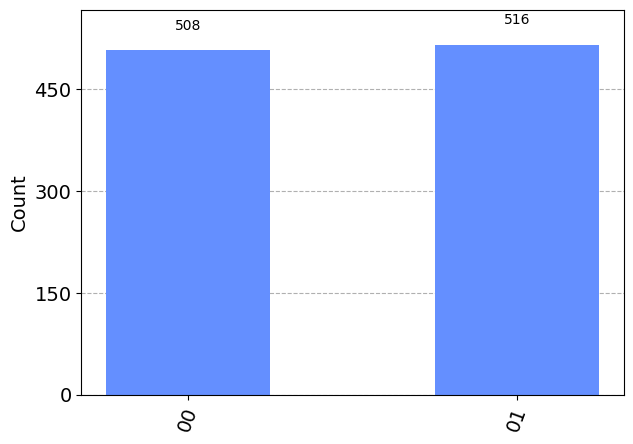

In [4]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
q0,q1=qr
c0,c1=cr
qc.h(q0)
qc.measure(q0,c0)
qc.measure(q1,c1)
simulator = Aer.get_backend('aer_simulator')
qc= transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts)

> ### Returning measurement outcomes for each shot
The <font color=darksalmon>QasmSimulator</font> also supports returning a list of measurement outcomes for each individual shot. This is enabled by setting the keyword argument memory=True in the run. You can set shots to as many as you like.

In [5]:
# Run and get memory
result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['00', '01', '00', '01', '00', '01', '00', '01', '00', '00']


> ### Simulation Method

The <font color=darksalmon>AerSimulator</font> supports a variety of simulation methods, each of which supports a different set of instructions. The method can be set manually using <font color=darksalmon>simulator.set_option(method=value)</font> option, or a simulator backend with a preconfigured method can be obtained directly from the Aer provider using Aer.get_backend.

When simulating ideal circuits, changing the method between the exact simulation methods <font color=darksalmon>stabilizer, statevector, density_matrix and matrix_product_state</font> should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

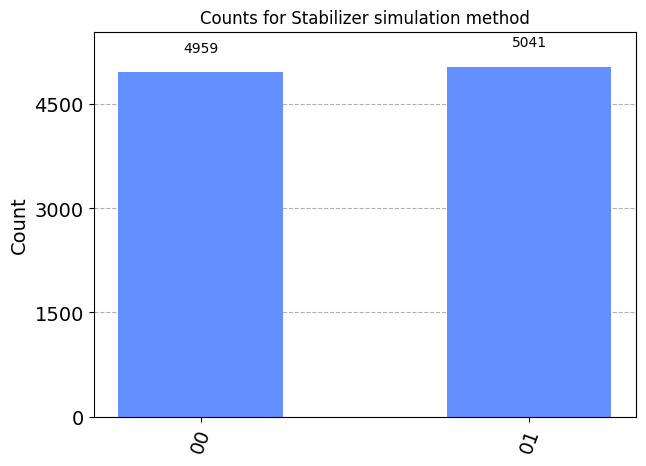

In [6]:
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(qc, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

plot_histogram(counts_stabilizer,title='Counts for Stabilizer simulation method')

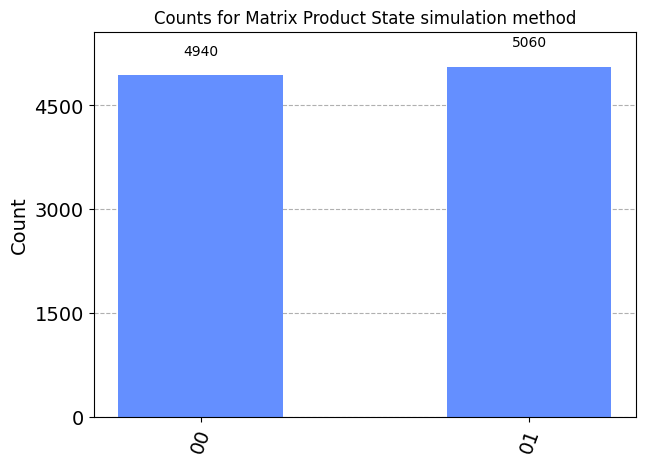

In [7]:
# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(qc, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram(counts_mps,title='Counts for Matrix Product State simulation method')

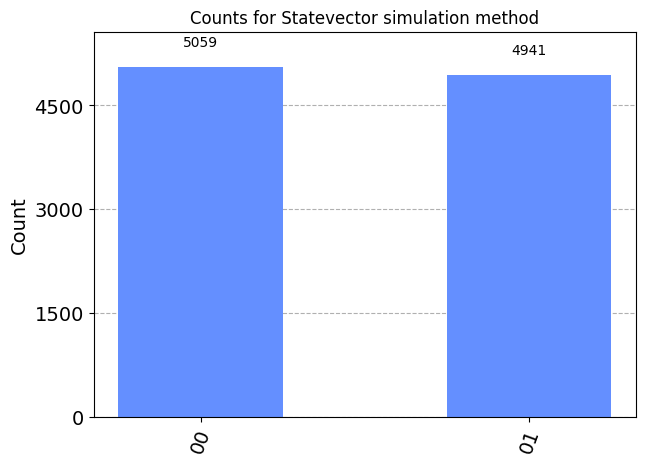

In [8]:
# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(qc, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

plot_histogram(counts_statevector, title='Counts for Statevector simulation method')

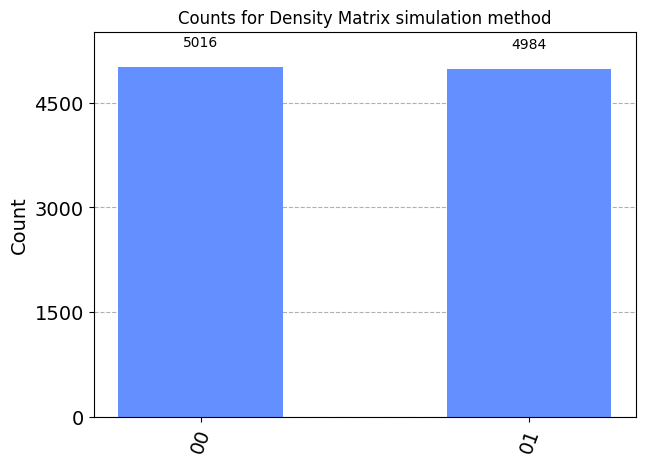

In [9]:
# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(qc, shots=shots)
counts_density = job_density.result().get_counts(0)

plot_histogram(counts_density,title='Counts for Density Matrix simulation method')

> ### Simulation Precision

One of the available simulator options allows setting the float precision for the statevector, density_matrix, unitary and superop methods. This is done using the set_precision="single" or precision="double" (default) option:

In [12]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'01': 522, '00': 502}


## <font color=lightblue><center><b><i>Practice Time!</b></i></center></font>

---

#### **Question 1:** Using the Aer simulator simulate a circuit.

In [ ]:
#
# 
# YOUR CODE HERE
# 
# 

#### **Question 2:** Using the Aer simulator simulate a state vector.

In [ ]:
#
# 
# YOUR CODE HERE
# 
# 

#### **Question 3:** Using the Aer simulator simulate a density matrix.

In [ ]:
#
# 
# YOUR CODE HERE
# 
# 